In [78]:
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(0,1,75)
lsta = [0.1, 1, 10, 100]
marker = ["-","^","v","*"]
plt.rcParams["figure.figsize"] = (20,10)

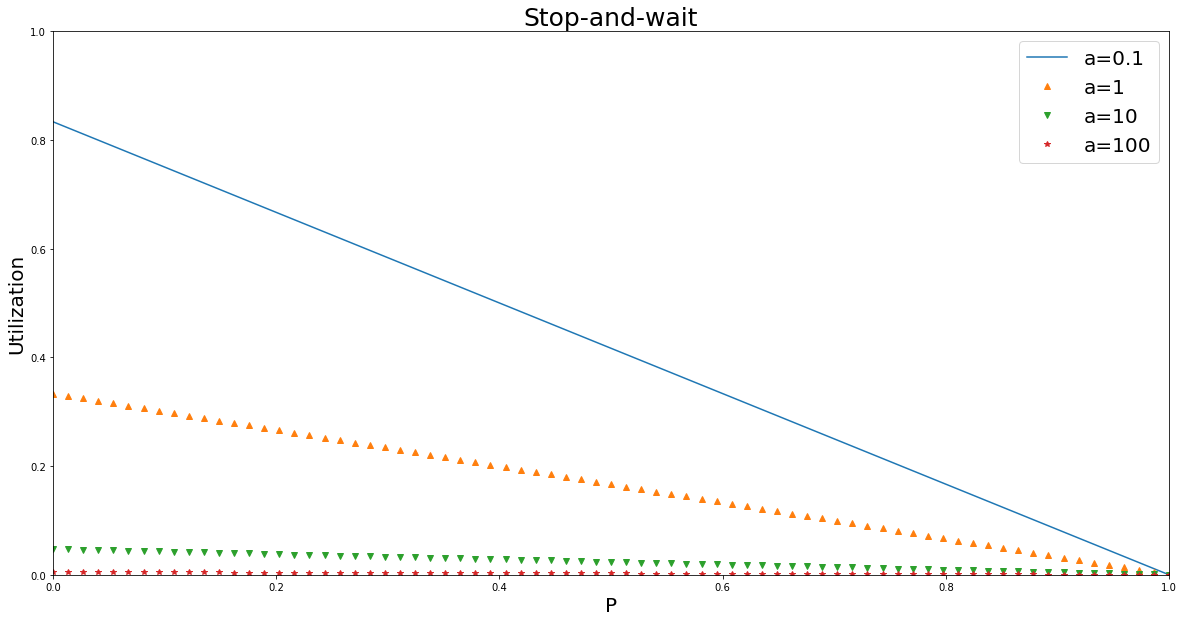

In [85]:
# Stop-and-wait
for a,m in zip(lsta, marker):
  u = (1-p)/(1+2*a)
  plt.plot(p, u, m)
plt.title("Stop-and-wait", fontsize=25)
plt.xlabel("P", fontsize=20)
plt.ylabel("Utilization", fontsize=20)
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(["a=0.1","a=1","a=10","a=100"], fontsize=20)
plt.show()

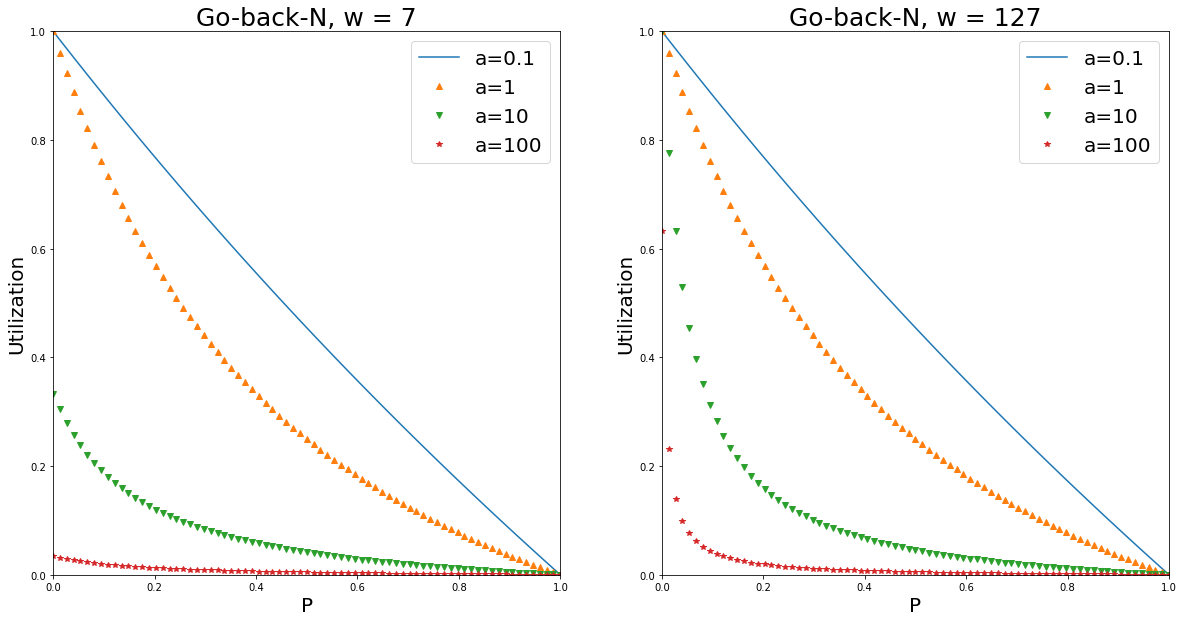

In [86]:
# Go-back-N
w = 7
for a, m in zip(lsta, marker):
  u = ((1 - p)/(1 + 2*a*p)) if (w >= (2*a + 1)) else (w*(1 - p)/(2*a + 1)/(1 - p + w*p))
  plt.subplot(1,2,1)
  plt.plot(p, u, m)
plt.title("Go-back-N, w = 7", fontsize=25)
plt.xlabel("P", fontsize=20)
plt.ylabel("Utilization", fontsize=20)
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(["a=0.1","a=1","a=10","a=100"], fontsize=20)

w = 127
for a, m in zip(lsta, marker):
  u = ((1 - p)/(1 + 2*a*p)) if (w >= (2*a + 1)) else (w*(1 - p)/((2*a + 1)*(1 - p + w*p)))
  plt.subplot(1,2,2)
  plt.plot(p, u, m)
plt.title("Go-back-N, w = 127", fontsize=25)
plt.xlabel("P", fontsize=20)
plt.ylabel("Utilization", fontsize=20)
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(["a=0.1","a=1","a=10","a=100"], fontsize=20)
plt.show()

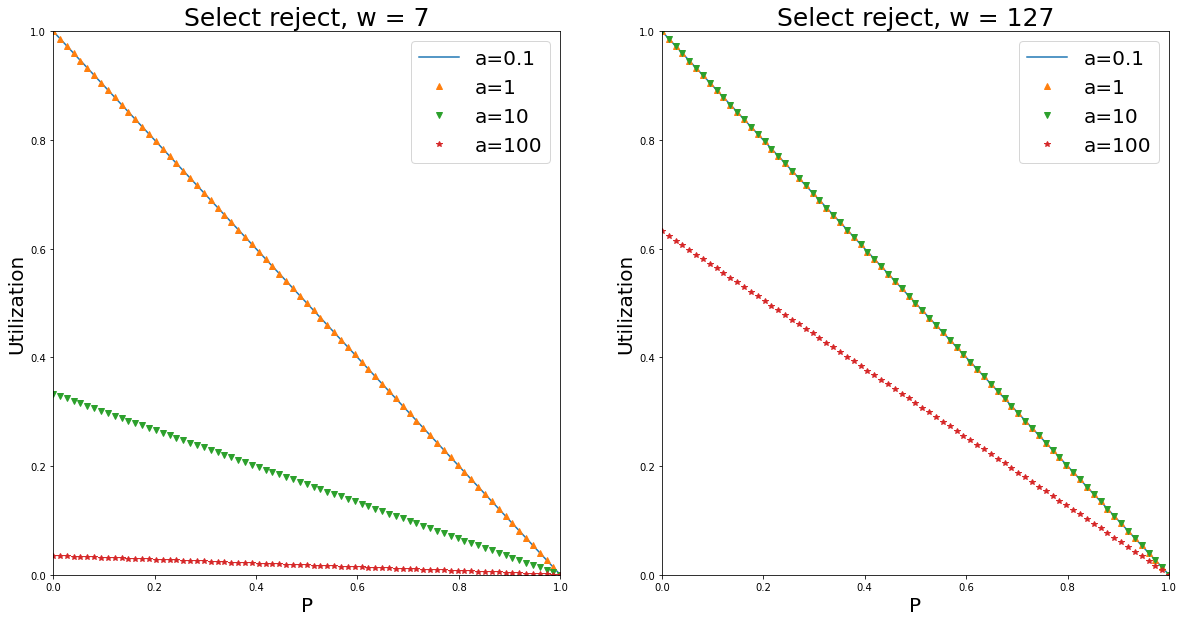

In [87]:
# Select reject
w = 7
for a, m in zip(lsta, marker):
  u = (1 - p) if (w >= (2*a + 1)) else (w*(1 - p)/(2*a + 1))
  plt.subplot(1,2,1)
  plt.plot(p, u, m)
plt.title("Select reject, w = 7", fontsize=25)
plt.xlabel("P", fontsize=20)
plt.ylabel("Utilization", fontsize=20)
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(["a=0.1","a=1","a=10","a=100"], fontsize=20)

w = 127
for a, m in zip(lsta, marker):
  u = (1 - p) if (w >= (2*a + 1)) else (w*(1 - p)/(2*a + 1))
  plt.subplot(1,2,2)
  plt.plot(p, u, m)
plt.title("Select reject, w = 127", fontsize=25)
plt.xlabel("P", fontsize=20)
plt.ylabel("Utilization", fontsize=20)
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(["a=0.1","a=1","a=10","a=100"], fontsize=20)
plt.show()

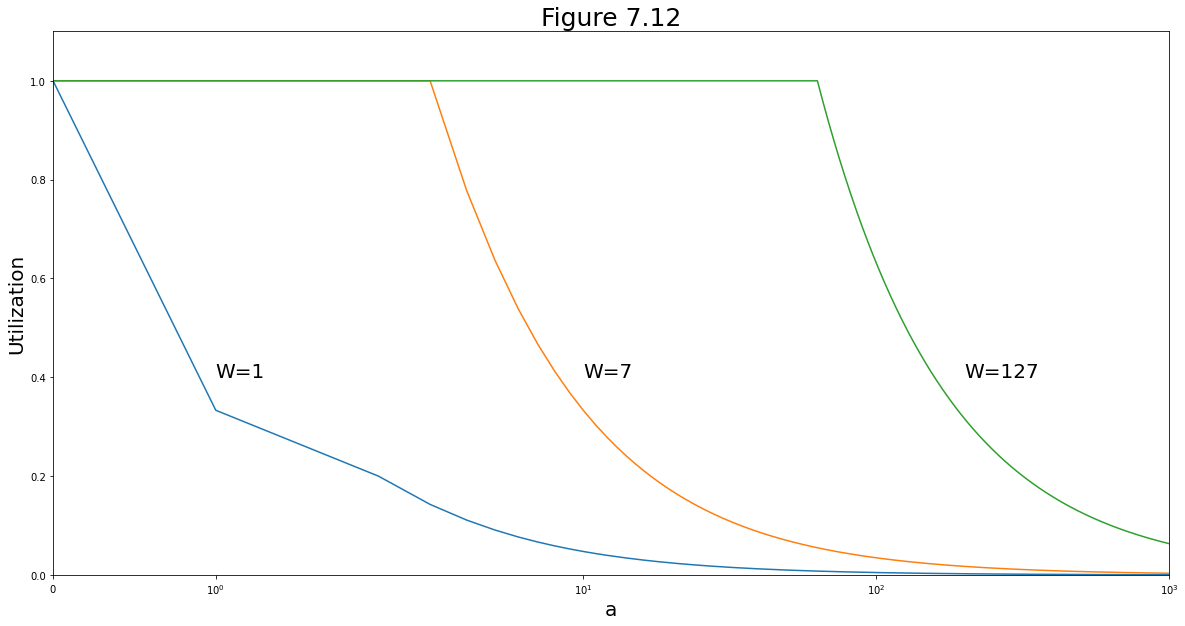

In [89]:
# 7-12
lsta = np.arange(0,1000,dtype=np.float64)
u1 = np.ones_like(lsta)
u7 = np.ones_like(lsta)
u127 = np.ones_like(lsta)

for i,a in enumerate(lsta):
  tmp = 2*a + 1
  u1[i] = 1 if (1 >= tmp) else 1/tmp
  u7[i] = 1 if (7 >= tmp) else 7/tmp
  u127[i] = 1 if (127 >= tmp) else 127/tmp

plt.plot(lsta, u1)
plt.plot(lsta, u7)
plt.plot(lsta, u127)

plt.annotate("W=1", (lsta[1], u1[1]), (1,0.4), fontsize=20)
plt.annotate("W=7", (lsta[1], u7[1]), (10,0.4), fontsize=20)
plt.annotate("W=127", (lsta[1], u127[1]), (200,0.4), fontsize=20)
plt.title("Figure 7.12", fontsize=25)
plt.xlabel("a", fontsize=20)
plt.ylabel("Utilization", fontsize=20)
plt.xlim([0,1000])
plt.ylim([0,1.1])
plt.ylabel("Utilization")
plt.xscale("symlog")
plt.show()

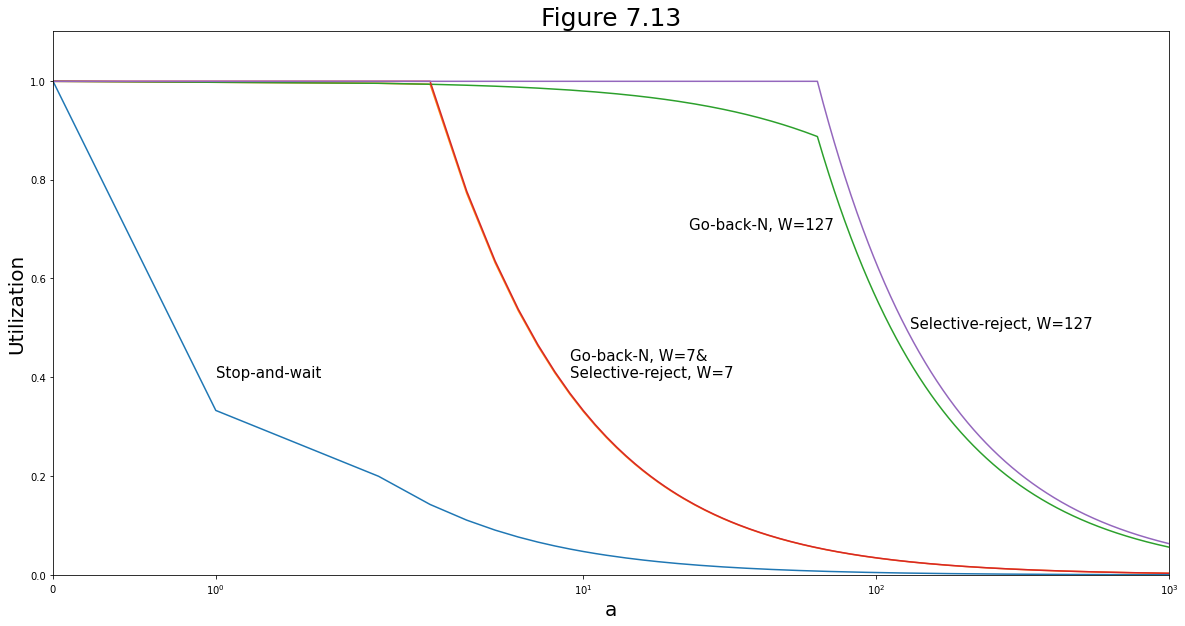

In [88]:
# Figure 13
p = 0.001
lsta = np.arange(0,1000, dtype=np.float64)

saw = np.zeros_like(lsta)
gbn7 = np.zeros_like(lsta)
gbn127 = np.zeros_like(lsta)
sr7 = np.zeros_like(lsta)
sr127 = np.zeros_like(lsta)

for i,a in enumerate(lsta):
  saw[i] = (1-p)/(1+2*a)
  gbn7[i] = ((1-p)/(1+2*a*p)) if (7 >= 2*a+1) else (7*(1-p)/((2*a+1)*(1-p+7*p)))
  gbn127[i] = ((1-p)/(1+2*a*p)) if (127 >= 2*a+1) else (127*(1-p)/((2*a+1)*(1-p+127*p)))
  sr7[i] = (1-p) if (7 >= 2*a+1) else ((7*(1-p))/(2*a+1))
  sr127[i] = (1-p) if (127 >= 2*a+1) else ((127*(1-p))/(2*a+1))

plt.plot(lsta, saw)
plt.plot(lsta, gbn7)
plt.plot(lsta, gbn127)
plt.plot(lsta, sr7)
plt.plot(lsta, sr127)
plt.annotate("Stop-and-wait", (lsta[1], saw[1]), (1,0.4), fontsize=15)
plt.annotate("Go-back-N, W=7&\nSelective-reject, W=7", (lsta[1], sr7[1]), (9,0.4), fontsize=15)
plt.annotate("Go-back-N, W=127", (lsta[1], u127[1]), (23,0.7), fontsize=15)
plt.annotate("Selective-reject, W=127", (lsta[1], u127[1]), (130,0.5), fontsize=15)
plt.title("Figure 7.13", fontsize=25)
plt.xlabel("a", fontsize=20)
plt.ylabel("Utilization", fontsize=20)
plt.xlim([0,1000])
plt.ylim([0,1.1])
plt.xscale("symlog")
plt.show()
